In [3]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: slice indices must be integers or None or have an __index__ method

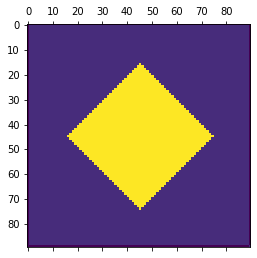

In [4]:
# T[i, j] = (T[i+1, j] + To[i-1, j] + To[i, j+1] + To[i, j-1])/4
time = 1
te = 20
L = 0.9
n = 90
a = 0.016
s = 0.1
Ti = 30
dx = L/n
dy = dx
dt = s/(a*(1/dx**2 + 1/dy**2))

x = np.linspace(0, L, n)
y = np.linspace(0, L, n)

T = Ti * np.ones([n, n]) 

T[0:n-1, 0] = te
T[0:n-1, n-1] = te
T[0, 0:n-1] = te
T[n-1, 0:n-1] = te

m = int(n/2)
size = int(m*2/3)
for k in range(size):
    #save1 = T[m+k, m+size-k:m+size] 
    #save2 = T[m+k, m-size:m-size+k+1]
    T[m-size+k, m:m+k] = 100
    T[m-size+k, m:m-k:-1] = 100
    T[m+k, m-size:m+size] = 100
    T[m+k, m+size-k:m+size] = Ti
    T[m+k, m-size:m-size+k+1] = Ti
t = 0
plt.matshow(T)
while t <= time:
    To = T.copy()
    for j in range(1, n-1):
        for i in range(1, n-1):
            T[i, j] = To[i, j] + dt*a*(((To[i-1, j] - 2*To[i, j] + To[i+1, j])/dx**2) + ((To[i, j-1] - 2*To[i,j] + To[i, j+1])/dy**2))
            for k in range(size):
                save1 = T[m+k, m+size-k:m+size] 
                save2 = T[m+k, m-size:m-size+k+1]
                T[m-size+k, m:m+k] = 100
                T[m-size+k, m:m-k:-1] = 100
                T[m+k, m-size:m+size] = 100

                
                # preciso pegar o q está em save1 e save2 e atribuir nas linhas 49 e 50
                #
                # preciso arrumar o codigo do ex1 pq ta errado, 
                # precisa adicionar as temperaturas do meio antes do looping de caluclo
        
                T[m+k, m+k:m:-1] = save1
                T[m+k, m:m+s-k] = save2
    t += dt

plt.figure(dpi=300)
plt.ylim([-0.02,0.92])
plt.xlim([-0.02, 0.92])
X, Y = np.meshgrid(x, y)
graf = plt.contour(X, Y, T, 9, vmin=20, vmax=100, linewidths=1, cmap='rainbow')
plt.clabel(graf, fontsize=5)
rectangle1 = plt.Rectangle((0,0), 0.9, 0.9, edgecolor='lightgrey', facecolor='wheat')
rectangle2 = plt.Rectangle((0.45, 0.25), 0.3, 0.3, angle=45, edgecolor='lightgrey', facecolor='white')
plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.show()
